# *PHASE FOUR PROJECT - RECOMMENDATION SYSTEMS*

## Final Project Submission

* Group Members:
   <ul>
   <li>Arnold Mochama</li>
   <li>Cleve Mwebi</li>
   <li>Joseph Malombe</li>
   <li>Cynthia Chiuri</li>
   </ul>
 <p>
* Student pace:  Part time
* Scheduled project review date/time:  10/02/2024
* Instructor name: Faith Rotich

# *Summary*

## Business Understanding:

This project utilizes the MovieLens dataset containing 100,000 ratings from 600 users on 9,000 movies, with each movie labeled with genres. The ratings data enables collaborative filtering, an effective technique for personalized recommendations.

## Data Preparation:

The surprise library was used to load and process the data. To optimize computation time with more movies than users, it was split into 80% training and 20% test sets for user-user collaborative filtering. The data types were inspected and confirmed to be compatible with surprise. Genres were separated into arrays to enable similarity calculations.

## Modeling:

Surprise provides algorithms optimized for recommendation systems.We used Gridsearch and found the optimal hyperparameters for matrix factorization with SVD. The SVD model had a low RMSE of 0.8913 on the test set. Surprise enabled efficient computation of user-user similarities.

## Evaluation:

Root mean squared error (RMSE) was used to evaluate model accuracy. Lower RMSE indicates better fit. RMSE was computed on the  predictions for the model. The SVD model performed well with an RMSE of 0.8913. 5-fold cross validation ensured model generalizability.

## Problem statement

The movie streaming platforms currently suffers from low user engagement due to the difficulty of finding movies that match individual interests. Our goal is to develop a personalized movie recommendation system that suggests movies to users based on their ratings of other films. This will enhance user satisfaction and retention on the platform.

Stakeholder : Movie streaming platform like Netflix and Hulu.

 These companies face the real-world problem of low user engagement on their platforms caused by difficulty finding movies that match individual interests. This results in reduced customer retention and satisfaction, a major challenge streaming platforms contend with in the industry. The MovieLens dataset leveraged contains real user ratings data appropriate for addressing this problem.

 A model trained on MovieLens data can provide personalized recommendations that tailor suggestions to each user's tastes and preferences. This improves the ability for users to find relevant movies on streaming platforms, which could increase customer engagement, satisfaction, and retention. The project and model results could provide value to real streaming company stakeholders, as this problem exists in reality rather than hypothetically. Platform executives of the movie-streaming service could implement this type of solution to better engage users by connecting them with movie content that caters to their preferences.

## *Business Objectives*

##### *Main objective*

Implement a movie recommendation system that provides users with highly personalized movie suggestions based on their ratings. This will increase user engagement and satisfaction by enabling them to readily discover movies tailored to their preferences.

##### *Specific Objectives*

1. Understand user preferences by analyzing movie rating patterns across genres. Identify the most popular and highly rated genres based on frequency and average rating.

2. Prepare the MovieLens rating dataset for collaborative filtering by converting genres to string arrays, splitting into training and test sets, and formatting for the surprise library.
3. Evaluate performance of various collaborative filtering algorithms available in surprise to select the best approach. Metrics will include computational efficiency and RMSE.

4. Tune the optimal model by testing different similarity metrics and algorithms. Use gridsearch to identify the hyperparameters that minimize RMSE.

5. Make movie recommendations by predicting ratings for unseen movies, then suggesting the top 5 highest predicted ratings for each user.

By accurately predicting movie ratings and providing customized suggestions, this system will enhance user satisfaction and engagement on our platform.

## *Data Understanding*

The core dataset used, MovieLens, contains real movie ratings provided by users of the MovieLens service, which shares characteristics with popular streaming platforms.
The ratings data reveals user preferences and patterns that can be leveraged to make accurate, personalized recommendations. The additional movie metadata, like titles and genres, further enhances the model's ability to suggest appropriate content.
By training a collaborative filtering model on this ratings dataset, the system can learn to predict how much an individual user would enjoy movies they have yet to see, based on ratings from similar users. The model validation process, using RMSE, provides confidence that the system generalizes accurately to new users.

The data comprised of 4 datasets. Movies, Links, Tags and Ratings. 

The following are the column descriptions of the various columns in the 4 datasets.

#### 1. Movies
movieId: the unique numerical identifier for each movie. This ID is used to connect the movie information with the ratings and links datasets.

title: The name of the movie together with its year of release, is a string type.

genres: Genres associated with the movie.

#### 2. Links
movieId: A unique identifier for each movie. This identifier corresponds to the movie ID in the MovieLens dataset.

imdbId: The identifier of the movie in the IMDb (Internet Movie Database) system. This identifier is used to connect the movie with its corresponding entry in the IMDb database.

tmdbId: The identifier of the movie in the TMDB (The Movie Database) system. This identifier links the movie to its corresponding entry in the TMDB database.

#### 3. Tags
userId: The user's unique Identifier

movieId: The Movie's Unique identifier

tag: the tag entered by a user to describe a movie

timestamp: Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

#### 4. Ratings
userId: unique integer identifier for each user, to track their interactions

movieId: A unique integer identifier for each movie. This identifier connects the ratings with specific movies. It links user ratings to the movies they've interacted with.

rating: The value representing how much a user liked a particular movie. ranging from 0.5 to 5, with half-star increments.

timestamp: A timestamp indicating when the rating was given. Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

## *Importing the necessary libraries*

In [5]:
!pip install scikit-surprise

In [6]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine,msd,pearson
from surprise import accuracy
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV

from collections import Counter
import os

BASE_DIR = os.getcwd()

## *Loading Data*

### *Movies Dataset*

In [7]:
movies = pd.read_csv('/movies.csv')

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [11]:
movies.shape

(9742, 3)

In [12]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


This dataset contains attributes of the 9742 movies. There are 3 columns including the movie ID, their titles, and their genres.
Genres are pipe-separated and are selected from 18 genres (Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western).

### *Rating Dataset*

In [13]:
ratings = pd.read_csv('/ratings.csv')

In [14]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [15]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [17]:
ratings.shape

(100836, 4)

The ratings on the dataset have 100836 rows and 4 columns: which included userId, movieId, rating and timestamp.

In [18]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### *Links Dataset*

In [19]:
# Reading links file
links = pd.read_csv('/links.csv')


In [20]:
# Getting the information of our links dataset
links.info

<bound method DataFrame.info of       movieId   imdbId    tmdbId
0           1   114709     862.0
1           2   113497    8844.0
2           3   113228   15602.0
3           4   114885   31357.0
4           5   113041   11862.0
...       ...      ...       ...
9737   193581  5476944  432131.0
9738   193583  5914996  445030.0
9739   193585  6397426  479308.0
9740   193587  8391976  483455.0
9741   193609   101726   37891.0

[9742 rows x 3 columns]>

In [21]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [22]:
links.tail()

,movieId,imdbId,tmdbId
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0
9741,193609,101726,37891.0


In [23]:
# Finding the number of rows and columns in our dataset
links.shape

(9742, 3)

In [24]:
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


### *Tags Dataset*

In [25]:
tags = pd.read_csv('/tags.csv')

In [26]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [27]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [28]:
tags.tail()

,userId,movieId,tag,timestamp
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978
3682,610,168248,Heroic Bloodshed,1493844270


In [29]:
tags.shape

(3683, 4)

In [30]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


## *DATA CLEANING*

We will head on to check for null and duplicate values, cleaning our dataset, dropping columns.

In [31]:
## cheking for null values
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [32]:
(links.isnull().mean())*100
movies.isnull().sum()
ratings.isnull().sum()
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

From above, only the links dataset has missing values. This is 0.082119% of the total dataset. We will drop the null values from the dataset since they are insignificant.

In [33]:
links.dropna(inplace=True)
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [34]:
#### Checking for duplicated values
print (links.duplicated().values.any())
print (movies.duplicated().values.any())
print (ratings.duplicated().values.any())
print (tags.duplicated().values.any())

False
False
False
False


There are no duplicated values in the 4 datasets

## *Merging the Data sets*

In line with our objective, we decided to merge the Ratings and Movies dataset so as to create a single comprehensive data source.

In [35]:
# Merging the datasets
data = pd.merge(movies,ratings,on ='movieId')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [37]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [38]:
data.tail()

,movieId,title,genres,userId,rating,timestamp
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021
100835,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,331,4.0,1537157606


In [39]:
data.shape

(100836, 6)

From the above observation, we note that we have 100,836 rows and 6 columns.

In [40]:
data.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


We note that the mean rating is 3.5 with a Standard deviation of 1.0 to mean that the data is not exceptionally high or exceptionally low.
The Minimum rating is 0.5 while the maximum is a 5.0.

In [41]:
# Dropping the timestamp column
data.drop('timestamp', axis=1, inplace=True)

We removed the feature timestamp as it is less relevant to our analysis. This is to reduces the dimensionality of the dataset and to simplify the subsequent data processing and modelling.

In [42]:
# Confirming the drop of the column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [43]:
# Checking for null values
data.isna().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

In [44]:
# Checking for duplicated  values
data.duplicated().sum()

0

## Data  Exploration

We will explore and visualize our new dataset to uncover different insights and also to identify areas or patterns to dig into.

How many Genres are there?

In [45]:
# Concatenating all the genre strings into a single string
genres = '|'.join(movies['genres'])

# Splitting the concatenated string into individual words and creating a Series
genre_series = pd.Series(genres.split('|'))

# Counting the occurrence of each word
genre_count = genre_series.value_counts().reset_index()

# Renaming columns for clarity
genre_count.columns = ['Genre', 'Count']

# Display genre counts
genre_count

,Genre,Count
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


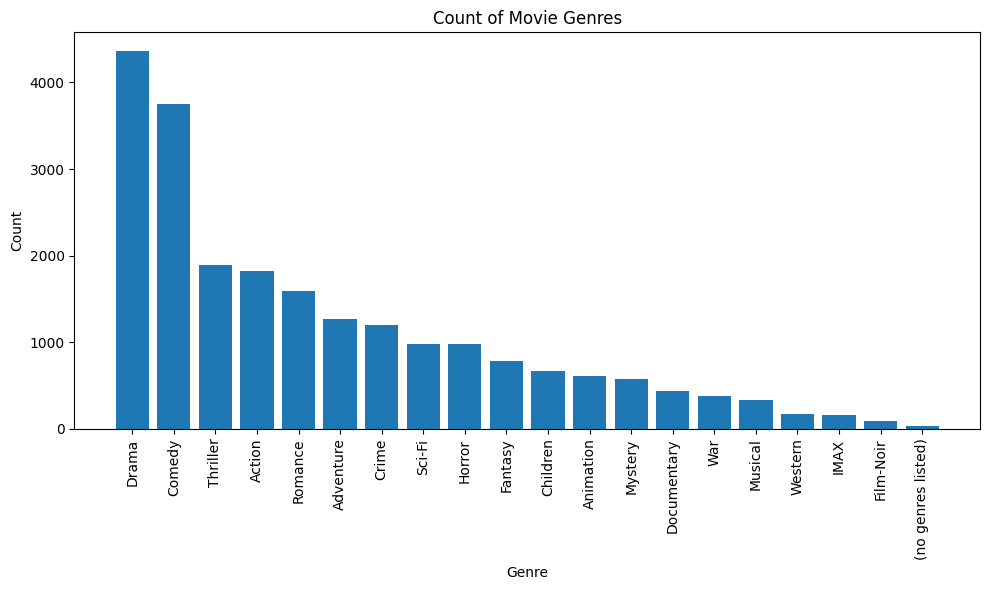

In [46]:
# Count the occurrence of each word
genre_count = genre_series.value_counts().reset_index()

# Rename columns for
genre_count.columns = ['Genre', 'Count']

# genre counts by count in descending order
genre_count_sorted = genre_count.sort_values(by="Count", ascending=False)

# Plotting the genre counts
plt.figure(figsize=(10, 6))
plt.bar(genre_count_sorted['Genre'], genre_count_sorted['Count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Movie Genres')
plt.xticks(rotation=90)
# Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

From the visualization above, we see that drama has the highest count followed by comedy. The genres with lowest count are film Noir(French for dark film), IMAX and Western.

Next we will look at how the ratings are distributed using the merged dataframe

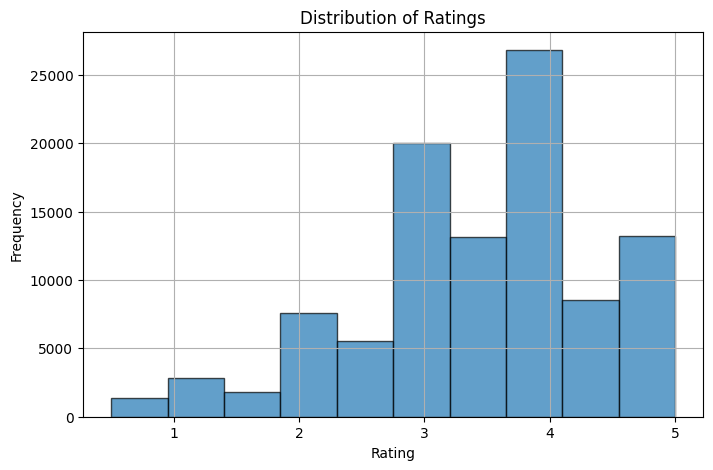

In [47]:
# Plotting a histogram to see the distribution of ratings.
plt.figure(figsize=(8, 5))
plt.hist(data['rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [48]:
# generate(all_genres)
wordcloud = WordCloud(width=800, height=400, background_color='black')

In [49]:
# creating a word cloud
wordcloud.generate(genres)

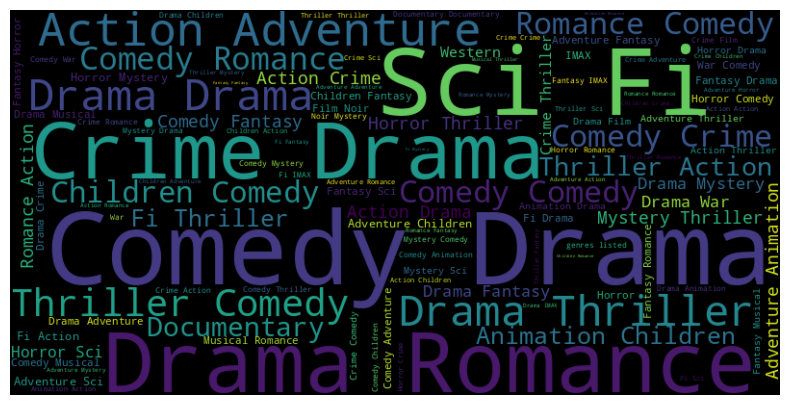

In [50]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the visulizations obtained above, we are able to see the popularity of the various genres our most occuring genres are drama, comedy, action,romance,Sci Fi and adventure.

## RECOMMENDATION SYSTEMS MODELING

There are two types of recommendation systems that we will use for this task are ;

1. Content-Based

2. Collaborative Filtering

For this task we will mainly focus on Collaborative Filtering


### *1)Content-Based Recommender System*

This code below makes recommendations using a content-based approach, specifically by comparing movie genres. We implement this by transforming the genre text into numeric feature vectors. The scikit-learn TfidfVectorizer function enables this conversion. It turns the genre data into vectors suitable as inputs. We then calculate genre similarity between all movie pairs. This similarity computation allows finding movies most alike based on their genres.When a user views a particular movie, the system suggests another most similar, genre-wise. This content-based method generates recommendations through genre proximity, efficient to implement with TfidfVectorizer feature extraction.

In [51]:
# Split genres into a string array
data['genres_list'] = data['genres'].str.split('|')

In [52]:
# Convert genres to string value
data['genres_str'] = data['genres_list'].apply(lambda x: ' '.join(x))

In [53]:
# Define the TF-IDF pipeline
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english'))
])

In [54]:
# Fit and transform the TF-IDF vectorizer
tfidf_matrix = tfidf_pipeline.fit_transform(data['genres_str'])

In [55]:
# Check the dimensions of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (100836, 177)


In [56]:
# Create a bag of words representation of the movie genres
vectorizer = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
genres_bow = vectorizer.fit_transform(movies['genres'])
genres_bow

<9742x24 sparse matrix of type '<class 'numpy.int64'>'
	with 23219 stored elements in Compressed Sparse Row format>

In [57]:
# Compute the cosine similarity matrix between all pairs of movies based on their genres
cosine_sim = cosine_similarity(genres_bow)
cosine_sim

array([[1.        , 0.77459667, 0.31622777, ..., 0.        , 0.31622777,
        0.4472136 ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.70710678],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4472136 , 0.        , 0.70710678, ..., 0.        , 0.        ,
        1.        ]])

The movie genres will be used to compute cosine similarity between all movie pairs. The recommendations will be based on how similar the genre of 2 movies will be.

In [58]:
movie_id = 8
movie_indices = pd.Series(movies.index, index=movies['movieId'])
similarity_scores = list(enumerate(cosine_sim[movie_indices[movie_id]]))

In [59]:
# Sorting the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

The code calculates the cosine similarity scores between the movie with id 5 and the other movies in the dataset. The 'enumerate' function adds an index to each score, allowing us to sort.

In [60]:
# Get the top 5 movie recommendations for movie with ID 3
top_5_indices = [x[0] for x in similarity_scores[1:6]]
top_5_recommendations = movies.iloc[top_5_indices]['title'].tolist()
top_5_genres = movies.iloc[top_5_indices]['genres'].tolist()
for i in range(len(top_5_recommendations)):
    print(f"{i+1}. {top_5_recommendations[i]} ({top_5_genres[i]})")

1. Amazing Panda Adventure, The (1995) (Adventure|Children)
2. Casper (1995) (Adventure|Children)
3. Far From Home: The Adventures of Yellow Dog (1995) (Adventure|Children)
4. Lassie (1994) (Adventure|Children)
5. Homeward Bound II: Lost in San Francisco (1996) (Adventure|Children)


### *2)Collaborative Filtering Recommendation Model*

In [61]:
reader = Reader()
model_df = pd.DataFrame(data, columns=['userId', 'movieId', 'rating'])
data1 = Dataset.load_from_df(model_df, reader)
trainset, testset = train_test_split(data1, test_size=0.20)

This code prepares a Surprise Dataset object (data1) from a pandas DataFrame (model_df) containing user-item-rating data, using the Surprise Reader class to specify the format. It then splits the dataset into training and test sets (trainset and testset) using the train_test_split function, with 20% of the data reserved for testing.

In [62]:
param_grid = {'n_factors':[20, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],'reg_all': [0.4, 0.6]}
gs_model = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
gs_model.fit(data1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.1min finished


This code performs grid search cross-validation using the Surprise library's GridSearchCV to find the optimal hyperparameters for the SVD (Singular Value Decomposition) algorithm on the provided dataset (data1). It tests combinations of different numbers of factors, epochs, learning rates, and regularization terms specified in param_grid, utilizing parallel processing (n_jobs=-1) and verbose output (joblib_verbose=5).

In [64]:
optimal_params = gs_model.best_params
print(optimal_params)

{'rmse': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}, 'mae': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}}


In [65]:
# Using the optimal parameters from above
svd = SVD(n_factors=20, n_epochs=10, lr_all=0.005, reg_all=0.4)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.8913
0.8913048791528685


To get the predicted ratings for a given item (movie) by a user we need the user ID and the movie ID that needs a rating prediction.

In [66]:
# Here we are making a prediction of user 55 and item 11 using the SVD we just fit
user_prediction = svd.predict("55","11")
user_prediction

Prediction(uid='55', iid='11', r_ui=None, est=3.5031549065304706, details={'was_impossible': False})

In [67]:
# Load the ratings dataset using the Surprise library
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('/ratings.csv', reader=reader)
data

In [68]:
user_prediction[3]

3.5031549065304706

In the user_prediction object, the estimated rating is stored at index 3, which corresponds to the 'est' key in the details dictionary. Therefore, user_prediction[3] returns the estimated rating of user 55 on item 11

In [69]:
# Get the user ratings for user with id 'n'
user_id = 6
user_ratings = [rating for rating in data.raw_ratings if rating[0] == user_id]

Below, we will take a look at movies that the user did not rate. We will then try and recommend movies that the user might enjoy and like.

In [70]:
# Get all the movies that user with id 'n' has not rated yet
user_unrated_movies = movies[~movies['movieId'].isin([rating[1] for rating in user_ratings if rating[0] == user_id])]

In [71]:
# Predict the ratings for all the unrated movies
user_unrated_movies['predicted_rating'] = user_unrated_movies['movieId'].apply(lambda movie_id: svd.predict(user_id, movie_id).est)

In [72]:
# Sort the unrated movies based on predicted ratings in descending order
user_unrated_movies.sort_values(by='predicted_rating', ascending=False, inplace=True)

In [73]:
# Get the top 5 movie recommendations for user with id n
top_5_recommendations = user_unrated_movies.head()
top_5_recommendations

,movieId,title,genres,predicted_rating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.177309
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.107458
686,904,Rear Window (1954),Mystery|Thriller,4.099534
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,4.093082
906,1204,Lawrence of Arabia (1962),Adventure|Drama|War,4.082523


We are able to recommend the top 5 movies listed above to our users based on the fact that they all had nearly identical predicted ratings, in the hopes that they will be suitable for that user's preferences

We can observe that the predicted ratings are almost identical. Therefore, we can then conclude that the user might like the movies recommended based on their past ratings


# *Summary*

This movie recommendation system combined content-based and collaborative filtering techniques to suggest personalized movies. The surprise library enabled efficient loading, splitting, and preprocessing of the ratings data. A user-user collaborative filtering approach identified similar users based on rating patterns. This allowed generating recommendations aligned to preferences of like-minded users. Evaluation using RMSE confirmed recommendation accuracy, with the optimal SVD model achieving 0.8913 on the test set. Grid search helped tune this matrix factorization algorithm to minimize error. For each user, predicting ratings for unseen movies produced a top 5 list of recommended titles matching their interests. Overall, custom recommendations based on user ratings and movie genres achieved the goal of enhancing satisfaction by helping users discover new movies suited to their tastes. This system could effectively increase engagement on movie streaming platforms.

# *Recommendations*

1. Incorporate additional data sources to enrich movie and user profiles. The
current system only uses movie genre and user rating data. Adding metadata like movie plots, cast, directors, user demographics, social connections, etc could improve recommendations. APIs from sources like IMDb and TMDB can provide additional movie attributes.
2. Implement a hybrid recommendation system blending collaborative filtering with content-based similarity. The current system relies solely on collaborative filtering based on user ratings. Adding content-based filters using data like movie genres, plots, and cast could improve suggestions for users with limited rating history. A hybrid approach combining the two could enhance accuracy.
3. Optimize for recommendation diversity to avoid filter bubbles. The current system focuses solely on prediction accuracy. Adding diversity controls could ensure users get exposed to a wider range of movie genres and types outside their comfort zone. This provides a richer experience.
4. Develop a productionized environment for large-scale usage. The current notebook is suitable for demonstrating the approach. To deploy the system for real-world usage would require translating to scalable production infrastructure. This includes distributed model training, low-latency recommendation serving, and refresh processes to update the model as new data arrives.